In [6]:
# Initialize Otter
import otter
grader = otter.Notebook("hw01.ipynb")

# Homework 1: Causality and Expressions

Please complete this notebook by filling in the cells provided. Before you begin, run the previous cell to load the provided tests.

**Recommended Readings:**

- [What is Data Science?](http://www.inferentialthinking.com/chapters/01/what-is-data-science.html)
- [Causality and Experiments](http://www.inferentialthinking.com/chapters/02/causality-and-experiments.html) 
- [Programming in Python](http://www.inferentialthinking.com/chapters/03/programming-in-python.html)

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!


**Note: This homework has hidden tests on it. That means even though tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more hidden tests for correctness once everyone turns in the homework.**

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck.

## 1. Scary Arithmetic

<!-- BEGIN QUESTION -->

An ad for ADT Security Systems says,

> "When you go on vacation, burglars go to work [...] According to FBI statistics, over 25% of home burglaries occur between Memorial Day to Labor Day."

Do the data in the ad support the claim that burglars are more likely to go to work during the time between Memorial Day to Labor Day? Please explain your answer. **(6 Points)**

**Note:** You can assume that "over 25%" means only slightly over. Had it been much over, say closer to 30%, then the marketers would have said so.

**Note:** Memorial Day is observed on the last Monday of May and Labor Day is observed on the first Monday of September.

<!--
BEGIN QUESTION
name: q1
manual: True
-->

Well, that's an interesting question. 

Approach 1: Quick and Easy

I initially conjectured that "No, the data shows that over 25% of burglaries happen in this interval, and since 25% is not a majority (greater than 50%), burglaries are not more likely to occur in the given time period".

But let's take a step back and look at the question a bit more carefully:

---------------------------

Approach 2: Let's think about Causation vs Correlation

"...the claim that burglars [ARE MORE LIKELY] to go to work during..."

So, what does this 'are more likely' really mean? --> The question is asking us if the time period INFLUENCES burglar activity! Given a time period, is a burglary more likely, less likely, or just as likely to happen? That's the nature of this question. The claim in question is literally "burglarly is more likely during a certain time". Now that we are armed with this information, let's look at the data in the advertisement again and see what it tells us.

The ad says 25% of burgalries happen during the given interval. Let's suppose that there is some hypothetical set of reasons 'X' out there such that this reason set X is responsible for the particular percentage of burglaries and the increased frequency. 

     original reason 'X': Santa steals during the interval, and gives them back later....
              /                                                 \
        causes                                                   causes
       /                                                                \
1 of 4 burglaries happen during the interval     <--correlated-->       burglaries more frequent during interval

Assuming this to be the case, we must determine that these two events are correlated by some subset of reasons from the X, and are not actually caused by one another. Although it's nice to think that more crime means it's more likely, putting more crime into the picture doesn't make it more likely.

TL,DR: That's like saying since you have more chickens, you're more likely to get eggs. 

---------------------------

Approach 3: Think about it like a Data Scientist

You are given one sliver of data that one in four burglaries happens in this interval. 
Okay. 
How does that prove that burglaries are more likely to happen during this interval? How much data do you need to be confident? Absolutely certain about your claim?
In the case of one data point, I can easily point out the complement and say "Hey, 3 of 4 don't happen in the interval. Perhaps burglaries are not so likely". 

Using historical data like this is important, but how do you go about making use of it in a fashion that is indisputable?

---------------------------

Approach 4: Turn off brain, Turn on CHAT-GPT.

The data in the ad support the claim that more home burglaries occur between Memorial Day and Labor Day, but it doesn't necessarily mean that burglars are more likely to go to work during that time. The FBI statistics mentioned in the ad simply show that a higher number of home burglaries occur during that time period, but they don't provide any information on why that is the case.

There could be many reasons why more home burglaries occur during the time between Memorial Day and Labor Day. For example, many people go on vacation during this time, which can leave their homes unoccupied and more vulnerable to break-ins. Additionally, summer is typically a time when people are more active and spend more time outside, which can also make their homes more vulnerable to burglaries.

In conclusion, the data in the ad support the claim that more home burglaries occur between Memorial Day and Labor Day, but it doesn't necessarily mean that burglars are more likely to go to work during that time. Further research would be needed to determine the specific reasons for the increase in home burglaries during this time period.

<!-- END QUESTION -->



## 2. Characters in Little Women


In lecture, we counted the number of times that the literary characters were named in each chapter of the classic book, [*Little Women*](https://inferentialthinking.com/chapters/01/3/1/Literary_Characters.html?highlight=little%20women). In computer science, the word "character" also refers to a letter, digit, space, or punctuation mark; any single element of a text. The following code generates a scatter plot in which each dot corresponds to a chapter of *Little Women*. The horizontal position of a dot measures the number of periods in the chapter. The vertical position measures the total number of characters.

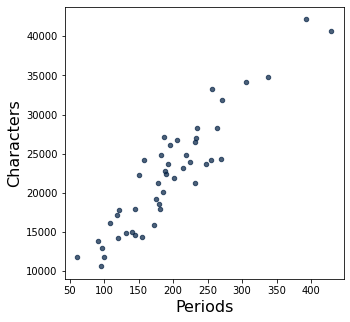

In [1]:
# Just run this cell.

# This cell contains code that hasn't yet been covered in the course,
# but you should be able to interpret the scatter plot it generates.

from datascience import *
from urllib.request import urlopen
import numpy as np
import d8error
%matplotlib inline

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
chapters = urlopen(little_women_url).read().decode().split('CHAPTER ')[1:]
text = Table().with_column('Chapters', chapters)
Table().with_columns(
    'Periods',    np.char.count(chapters, '.'),
    'Characters', text.apply(len, 0)
    ).scatter(0)

**Question 1.** Around how many periods are there in the chapter with the most characters? Assign either 1, 2, 3, 4, or 5 to the name `characters_q1` below. **(4 Points)**

1. 250
2. 390
3. 440
4. 32,000
5. 40,000


**Note:** If you run into a `NameError: name 'grader' is not defined` error in the autograder cell below (and in any assignment), please re-run the first cell at the very top of this notebook!

<!--
BEGIN QUESTION
name: q2_1
manual: false
points:
 - 0
 - 4
-->

In [7]:
characters_q1 = 3

In [8]:
grader.check("q2_1")

q2_1 results: All test cases passed!

The test above checks that your answers are in the correct format. **This test does not check that you answered correctly**, only that you assigned a number successfully in each multiple-choice answer cell.

**Question 2.** Which of the following chapters has the most characters per period? Assign either 1, 2, or 3 to the name `characters_q2` below. **(4 Points)**

1. The chapter with about 60 periods
2. The chapter with about 350 periods
3. The chapter with about 440 periods

<!--
BEGIN QUESTION
name: q2_2
manual: false
points:
 - 0
 - 4
-->

In [9]:
characters_q2 = 1

In [10]:
grader.check("q2_2")

q2_2 results: All test cases passed!

Again, the test above checks that your answers are in the correct format, but not that you have answered correctly.

To discover more interesting facts from this plot, check out [Section 1.3.2](https://inferentialthinking.com/chapters/01/3/2/Another_Kind_Of_Character.html) in the textbook.

## 3. Names and Assignment Statements

**Question 1.** When you run the following cell, Python produces a cryptic error message.

In [11]:
4 = 2 + 2

SyntaxError: can't assign to literal (2912417615.py, line 1)

Choose the best explanation of what's wrong with the code, and then assign 1, 2, 3, or 4 to `names_q1` below to indicate your answer. **(4 Points)**

1. Python is smart and already knows `4 = 2 + 2`.

2. In Python, it's a rule that the `=` sign must have a variable name to its left, and `4` isn't a variable name.

3. It should be `2 + 2 = 4`.

4. I don't get an error message. This is a trick question.

<!--
BEGIN QUESTION
name: q3_1
manual: False
points:
 - 0
 - 4
-->

In [12]:
names_q1 = 2

In [13]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 2.** When you run the following cell, Python will produce another cryptic error message.

In [11]:
two = 3
six = two plus two

## **Uh-o it seems we have an error!**

It seems we have a SyntaxError. SyntaxErrors are usually because of:

1. Adding extra parenthesis

2. Not following python define or for loop structure, not adding a colon

The Data 8 Reference might be helpful to look over for examples and usage: [Data 8 Reference](http://data8.org/sp22/python-reference.html)

If you are having more trouble please feel free to consult a staff member                        
 or see the error message below 

Accordion(children=(VBox(children=(VBox(children=(Label(value='Was the message you saw useful?'), Dropdown(opt…

SyntaxError: invalid syntax (3853341378.py, line 2)

Choose the best explanation of what's wrong with the code and assign 1, 2, 3, or 4 to `names_q2` below to indicate your answer. **(4 Points)**

1. The `plus` operation only applies to numbers, not the word "two".

2. The name "two" cannot be assigned to the number 3.

3. Two plus two is four, not six.

4. The name `plus` isn't a built-in operator; instead, addition uses `+`.

<!--
BEGIN QUESTION
name: q3_2
manual: False
points:
 - 0
 - 4
-->

In [14]:
names_q2 = 4

In [15]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.** Run the following cell.

In [16]:
x = 2
y = 3 * x
x = 4

What is `y` after running this cell, and why? Choose the best explanation and assign 1, 2, 3, or 4 to `names_q3` below to indicate your answer. **(4 Points)**

1. `y` is equal to 6, because the second `x = 4` has no effect since `x` was already defined.

2. `y` is equal to 6, because `x` was 2 when `y` was assigned, and 3 * 2 is 6.

3. `y` is equal to 12, because `x` is 4 and 3 * 4 is 12.

4. `y` is equal to 12, because assigning `x` to 4 will update `y` to 12 since `y` was defined in terms of `x`.

<!--
BEGIN QUESTION
name: q3_3
manual: false
points:
 - 0
 - 4
-->

In [17]:
names_q3 = 2

In [18]:
grader.check("q3_3")

q3_3 results: All test cases passed!

## 4. Differences Between Majors

Berkeley’s Office of Planning and Analysis provides data on numerous aspects of the campus. Adapted from the OPA website, the table below displays the number of degree recipients in three majors in the 2008-2009 and 2017-2018 academic years.

| Major                              | 2008-2009    | 2017-2018   |
|------------------------------------|--------------|-------------|
| Gender and Women's Studies         |      17      |    28       |
| Linguistics                        |      49      |    67       |
| Rhetoric                           |      113     |    56       |



**Question 1.** Suppose you want to find the **biggest** absolute difference between the number of degree recipients in the two years, among the three majors.

In the cell below, compute this value and call it `biggest_change`. Use a single expression (a single line of code) to compute the answer. Let Python perform all the arithmetic (like subtracting 49 from 67) rather than simplifying the expression yourself. The built-in `abs` function takes a numerical input and returns the absolute value. The built-in `max` function can take in 3 arguments and returns the maximum of the three numbers. **(5 Points)**

<!--
BEGIN QUESTION
name: q4_1
manual: False
points:
 - 0
 - 5
-->

In [28]:
data = [[17,28],[49,67],[113,56]]
diff_for_each_major = [abs(data[i][len(data[i])-1]-data[i][0]) for i in range(len(data))]
biggest_change = max(diff_for_each_major)
biggest_change

57

In [29]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 2.** Which of the three majors had the **smallest** absolute difference? Assign `smallest_change_major` to 1, 2, or 3 where each number corresponds to the following major:

1. Gender and Women's Studies  
2. Linguistics  
3. Rhetoric

Choose the number that corresponds to the major with the smallest absolute difference.

You should be able to answer by rough mental arithmetic, without having to calculate the exact value for each major. **(4 Points)** 

<!--
BEGIN QUESTION
name: q4_2
manual: False
points:
 - 0
 - 4
-->

In [30]:
smallest_change_major = min(range(len(diff_for_each_major)), key=diff_for_each_major.__getitem__)
smallest_change_major

0

In [31]:
grader.check("q4_2")

q4_2 results: All test cases passed!

In [33]:
print(data)
print(diff_for_each_major)

[[17, 28], [49, 67], [113, 56]]
[11, 18, 57]


**Question 3.**  For each major, define the “relative change” to be the following: $\large{\frac{\text{absolute difference}}{\text{value in 2008-2009}} * 100}$ 

Fill in the code below such that `gws_relative_change`, `linguistics_relative_change` and `rhetoric_relative_change` are assigned to the relative changes for their respective majors. **(5 Points)**

<!--
BEGIN QUESTION
name: q4_3
manual: False
points:
 - 0
 - 0 
 - 0
 - 1
 - 2
 - 2
-->

In [34]:
gws_relative_change = (abs(17-28) / 17) * 100
linguistics_relative_change = diff_for_each_major[1]/(data[1][0]-data[1][1])*100
rhetoric_relative_change = (abs(113-56) / 113-56) * 100
gws_relative_change, linguistics_relative_change, rhetoric_relative_change

(64.70588235294117, -100.0, -5549.557522123894)

In [35]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.** Assign `biggest_rel_change_major` to 1, 2, or 3 where each number corresponds to to the following: 

1. Gender and Women's Studies  
2. Linguistics  
3. Rhetoric

Choose the number that corresponds to the major with the biggest relative change. **(4 Points)**

<!--
BEGIN QUESTION
name: q4_4
manual: False
points:
 - 0
 - 4
-->

In [36]:
biggest_rel_change_major = max(gws_relative_change, linguistics_relative_change, rhetoric_relative_change)
biggest_rel_change_major

64.70588235294117

In [37]:
grader.check("q4_4")

q4_4 results: All test cases passed!

## 5. Nearsightedness Study

[Myopia](https://en.wikipedia.org/wiki/Myopia), or nearsightedness, results from a number of genetic and environmental factors. In 1999, Quinn et al studied the relation between myopia and ambient lighting at night (for example, from nightlights or room lights) during childhood.

<!-- BEGIN QUESTION -->

**Question 1.** The data were gathered by the following procedure, reported in the study. "Between January and June 1998, parents of children aged 2-16 years [...] that were seen as outpatients in a university pediatric ophthalmology clinic completed a questionnaire on the child's light exposure both at present and before the age of 2 years." Was this study observational, or was it a controlled experiment? Explain. **(5 Points)**

<!--
BEGIN QUESTION
name: q5_1
manual: True
-->

Absolutely observational. No positive or negative control groups...just a survey on some random people.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.** The study found that of the children who slept with a room light on before the age of 2, 55% were myopic. Of the children who slept with a night light on before the age of 2, 34% were myopic. Of the children who slept in the dark before the age of 2, 10% were myopic. The study concluded the following: "The prevalence of myopia [...] during childhood was strongly associated with ambient light exposure during sleep at night in the first two years after birth."

Do the data support this statement? Why or why not? You may interpret "strongly" in any reasonable qualitative way. **(5 Points)**

<!--
BEGIN QUESTION
name: q5_2
manual: True
-->

Yes, the data supports that there exists some kind of correlation (whether or not the correlation is strong is up for debate) between light exposure while sleeping during a certain age. This can be seen in the pattern of people who slept with a light exhibiting possibility of myopia. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.** On May 13, 1999, CNN reported the results of this study under the headline, "Night light may lead to nearsightedness." Does the conclusion of the study claim that night light causes nearsightedness? **(5 Points)**

<!--
BEGIN QUESTION
name: q5_3
manual: True
-->

NO. The title is fair in saying 'may lead to'...because science is at its heart a speculative and inquisitive endeavor, and thinking about the things that will grab people's interest is a sure way to lead any investigation.

However, this claim is outright wrong if we only consider the previously given associations. It's just not enough to prove that there exists a significant and indisputable causal relationship between the two factors. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.** The final paragraph of the CNN report said that "several eye specialists" had pointed out that the study should have accounted for heredity.

Myopia is passed down from parents to children. Myopic parents are more likely to have myopic children, and may also be more likely to leave lights on habitually (since the parents have poor vision). In what way does the knowledge of this possible genetic link affect how we interpret the data from the study? Explain. **(5 Points)**

<!--
BEGIN QUESTION
name: q5_4
manual: True
-->

The data from the study needs to be revised to take into account the genetic makeup of the patients that were surveyed. 

I wanted to dispute that myopic people don't need the lights on to see well, and then I recalled my personal struggles with seeing well in the dark.....that kinda makes sense, now that I think about it.

<!-- END QUESTION -->



## 6. Studying the Survivors

The Reverend Henry Whitehead was skeptical of John Snow’s conclusion about the Broad Street pump. After the Broad Street cholera epidemic ended, Whitehead set about trying to prove Snow wrong.  (The history of the event is detailed [here](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC1034367/pdf/medhist00183-0026.pdf).)

He realized that Snow had focused his analysis almost entirely on those who had died. Whitehead, therefore, investigated the drinking habits of people in the Broad Street area who had not died in the outbreak.

What is the main reason it was important to study this group? Assign either 1, 2, or 3 to the name `survivor_answer` below. **(4 Points)**

1. If Whitehead had found that many people had drunk water from the Broad Street pump and not caught cholera, that would have been evidence against Snow's hypothesis.

2. Survivors could provide additional information about what else could have caused the cholera, potentially unearthing another cause.

3. Through considering the survivors, Whitehead could have identified a cure for cholera.

<!--
BEGIN QUESTION
name: q6_1
manual: False
points:
 - 0
 - 4
-->

In [38]:
survivor_answer = 1

In [39]:
grader.check("q6_1")

q6_1 results: All test cases passed!

**Note:** Whitehead ended up finding further proof that the Broad Street pump played a central role in spreading the disease to the people who lived near it. Eventually, he became one of Snow’s greatest defenders.

You're done with Homework 1!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Then submit the zip file to the corresponding assignment according to your instructor's directions. 

**It is your responsibility to make sure your work is saved before running the last cell.**


---

To double-check your work, the cell below will rerun all of the autograder tests.

In [26]:
grader.check_all()

q2_1 results:
    q2_1 - 1 result:
        Trying:
            1 <= characters_q1 <= 5
        Expecting:
            True
        **********************************************************************
        Line 1, in q2_1 0
        Failed example:
            1 <= characters_q1 <= 5
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.7/doctest.py", line 1337, in __run
                compileflags, 1), test.globs)
              File "<doctest q2_1 0[0]>", line 1, in <module>
                1 <= characters_q1 <= 5
            TypeError: '<=' not supported between instances of 'int' and 'ellipsis'

q2_2 results:
    q2_2 - 1 result:
        Trying:
            1 <= characters_q2 <= 3
        Expecting:
            True
        **********************************************************************
        Line 1, in q2_2 0
        Failed example:
            1 <= characters_q2 <= 3
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.7/doctest.py", line 1337, in __run
                compileflags, 1), test.globs)
              File "<doctest q2_2 0[0]>", line 1, in <module>
                1 <= characters_q2 <= 3
            TypeError: '<=' not supported between instances of 'int' and 'ellipsis'

q3_1 results:
    q3_1 - 1 result:
        Trying:
            1 <= names_q1 <= 4
        Expecting:
            True
        **********************************************************************
        Line 1, in q3_1 0
        Failed example:
            1 <= names_q1 <= 4
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.7/doctest.py", line 1337, in __run
                compileflags, 1), test.globs)
              File "<doctest q3_1 0[0]>", line 1, in <module>
                1 <= names_q1 <= 4
            TypeError: '<=' not supported between instances of 'int' and 'ellipsis'

q3_2 results:
    q3_2 - 1 result:
        Trying:
            1 <= names_q2 <= 4
        Expecting:
            True
        **********************************************************************
        Line 1, in q3_2 0
        Failed example:
            1 <= names_q2 <= 4
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.7/doctest.py", line 1337, in __run
                compileflags, 1), test.globs)
              File "<doctest q3_2 0[0]>", line 1, in <module>
                1 <= names_q2 <= 4
            TypeError: '<=' not supported between instances of 'int' and 'ellipsis'

q3_3 results:
    q3_3 - 1 result:
        Trying:
            1 <= names_q3 <= 4
        Expecting:
            True
        **********************************************************************
        Line 1, in q3_3 0
        Failed example:
            1 <= names_q3 <= 4
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.7/doctest.py", line 1337, in __run
                compileflags, 1), test.globs)
              File "<doctest q3_3 0[0]>", line 1, in <module>
                1 <= names_q3 <= 4
            TypeError: '<=' not supported between instances of 'int' and 'ellipsis'

q4_1 results:
    q4_1 - 1 result:
        Trying:
            isinstance(biggest_change, (int, float))
        Expecting:
            True
        **********************************************************************
        Line 1, in q4_1 0
        Failed example:
            isinstance(biggest_change, (int, float))
        Expected:
            True
        Got:
            False

q4_2 results:
    q4_2 - 1 result:
        Trying:
            isinstance(smallest_change_major, (int, float))
        Expecting:
            True
        **********************************************************************
        Line 1, in q4_2 0
        Failed example:
            isinstan

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [27]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)